## Imports

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
from numpy import *

## Example 1: Partial Sums

In [2]:
def a_n(n_max):
    series = []
    for n in range(1, n_max+1):
        summand = np.exp(n) / (np.exp(2*n)+9)
        series.append(summand)
    return series

sum(a_n(100))

0.35966058264111833

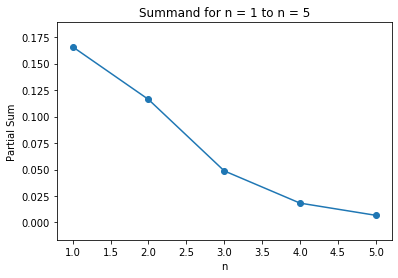

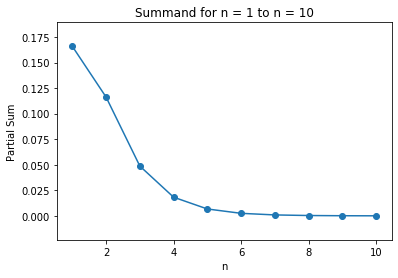

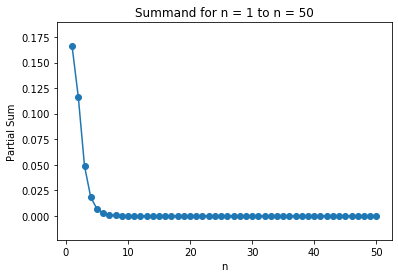

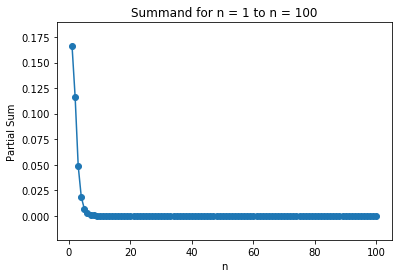

<Figure size 432x288 with 0 Axes>

In [3]:
n_list = [5, 10, 50, 100]

for n in n_list:
    x = range(1,n+1)
    y = a_n(n)
    plt.scatter(x,y)
    plt.plot(x,y)
    plt.title('Summand for n = 1 to n = ' + str(n))
    plt.xlabel('n')
    plt.ylabel('Partial Sum')
    plt.show()
    plt.clf()

## Example 2: Taylor Series Exansion of sin(x)

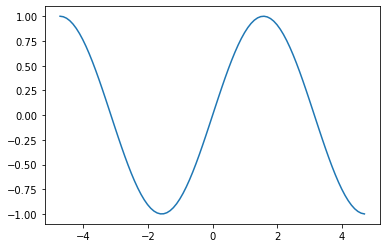

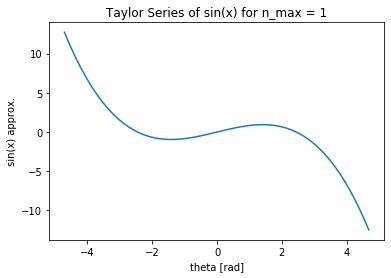

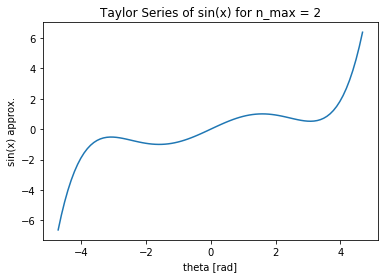

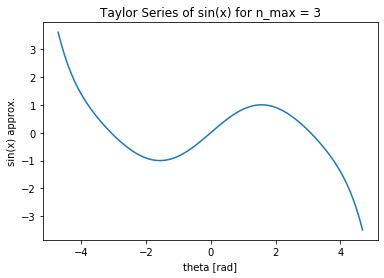

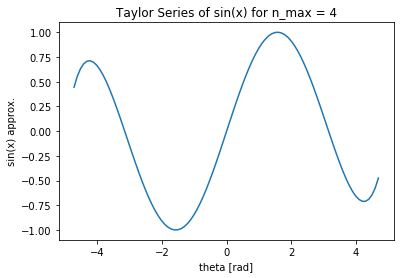

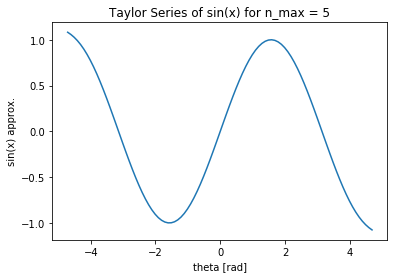

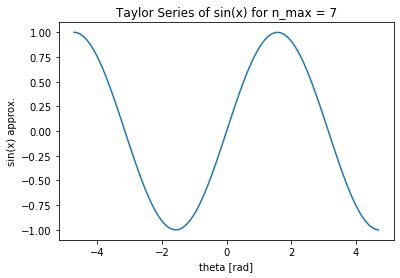

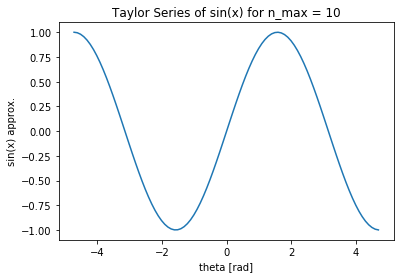

<Figure size 432x288 with 0 Axes>

In [5]:
th = np.arange(-1.5*np.pi, 1.5*np.pi, 0.1)

sinx = np.sin(th)

sin_taylor = lambda x, n: np.sum([((-1)**n * (x**(2*n+1))/(np.math.factorial(2*n+1))) for n in range(n+1)]) 

plt.plot(th, sinx)
plt.show()
# plt.clf()

for n in [1,2,3,4,5,7,10]:
    sin = [sin_taylor(x, n) for x in th]
    plt.plot(th, sin, label=f'sin(x) for n = {n}')
    plt.xlabel('theta [rad]')
    plt.ylabel('sin(x) approx.')
    plt.title(f'Taylor Series of sin(x) for n_max = {n}')
    plt.show()
    plt.clf()

In [6]:
n = 6
sin6 = np.array([sin_taylor(x, n) for x in th])

compare = list(zip(th, sinx, sin6))

In [7]:
print(compare[:10])

[(-4.71238898038469, 1.0, 0.9911385887311435), (-4.61238898038469, 0.9950041652780258, 0.9885595808459808), (-4.51238898038469, 0.9800665778412417, 0.9754128988184052), (-4.412388980384691, 0.9553364891256063, 0.9520009199731837), (-4.312388980384691, 0.9210609940028855, 0.918688699618676), (-4.2123889803846915, 0.8775825618903735, 0.8759090257776384), (-4.112388980384692, 0.8253356149096793, 0.8241650353957289), (-4.012388980384692, 0.7648421872844899, 0.7640306937053157), (-3.9123889803846925, 0.6967067093471674, 0.6961494043746577), (-3.812388980384693, 0.6216099682706668, 0.6212309897242915)]


In [8]:
df3 = pd.DataFrame(compare, columns=['x','sinx','sin6'])
df3

,x,sinx,sin6
0,-4.712389,1.000000,0.991139
1,-4.612389,0.995004,0.988560
2,-4.512389,0.980067,0.975413
3,-4.412389,0.955336,0.952001
4,-4.312389,0.921061,0.918689
...,...,...,...
90,4.287611,-0.911130,-0.908953
91,4.387611,-0.947722,-0.944654
92,4.487611,-0.974844,-0.970555
93,4.587611,-0.992225,-0.986276


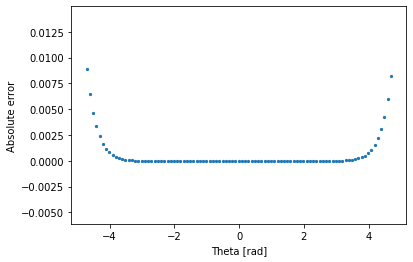

In [9]:
plt.scatter(df3['x'], np.abs(df3['sinx']-df3['sin6']), s=5)
plt.xlabel('Theta [rad]')
plt.ylabel('Absolute error')
plt.show()

In [10]:
np.allclose(df3['sinx'],df3['sin6'], atol=0.1)

True